In [1]:
import numpy as np
from numpy import loadtxt
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
import pyvisa as visa
from matplotlib import animation
from time import sleep
from matplotlib.animation import FuncAnimation
#Importing the functions from the module and the pulses dictionaries
from Sweeping import *
from Dictionaries import *
from PulseFiles import *
from Instrument import *
import pyqtgraph as pg 
import nidaqmx
import pickle

#  10nano

In [4]:
modulation = 93 #Hz
loop_number = 640000    
res = 1/2972160000

sam, sr , segment_length = Adj9(res,modulation,loop_number)

In [5]:
sam

336

In [6]:
sr

3124800000

In [7]:
interval = segment_length*1e9 #nano
interval

107.52688172043011

# AWG and Pulse files setup

In [2]:
AWG_Settings_10nano= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':150,
    'Clock Sample Frecuency':3124800000,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DC', #DAC output rout only has the SMA outputs: Direct Out and (Averaged) Direct Out, # DC hasAMP out, normal un averaged
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\60,30\neg\10nano'
}

In [3]:
M8190A = VisaR(AWG_Settings_10nano,60000)

In [8]:
M8190A.write('FREQ:RAST {a}'.format(a = sr))

21

In [ ]:
Initialization(M8190A,AWG_Settings_10nano)

Instruments Sampling Frecuency set to 1.25760000000000E+08Hz
Instruments Direct Out DAC Output route Voltage set to 7.00000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [9]:
Pump_10nano = {
    'Name':'Pump_10nano',
    'Amplitude': -2*60,
    'Start time':50,
    'End time':2e-10,
    'Start Duration':10,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [10]:
ProbeA_10nano = {
    'Name':'ProbeA_10nano',
    'Amplitude':-2*30,
    'Start time':30,
    'End time':70,
    'Start Duration':10,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [11]:
ProbeB_10nano= {
    'Name':'ProbeB_10nano',
    'Amplitude':2*30,
    'Start time':30,
    'End time':70,
    'Start Duration':10,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [13]:
PulseScheme_A_10nano =  {
    'Name' : 'PulseScheme_A_10nano',
    'Pulse Scheme': [Pump_10nano,ProbeA_10nano],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\60,30\neg\10nano'
}

In [14]:
PulseScheme_B_10nano =  {
    'Name' : 'PulseScheme_B_10nano',
    'Pulse Scheme': [Pump_10nano,ProbeB_10nano],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\60,30\neg\10nano'
}

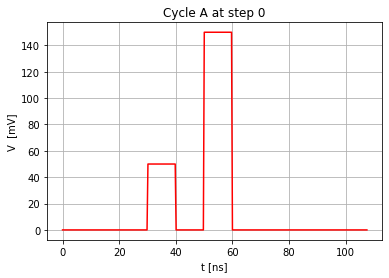

In [76]:
step = 0
pul1 = Sweep_dir_noteil(PulseScheme_A_10nano,70,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle A, Probe width 25nano {mod} Hz ,{a} step, {loop}loop number.jpeg'.format(loc = PulseScheme_A_25nano['Measurement file Path'], a = step,mod = modulation, loop = loop_number))

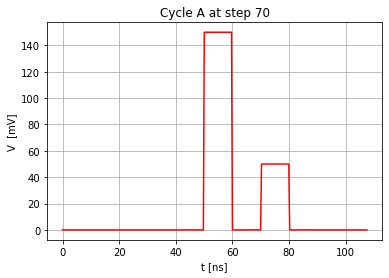

In [30]:
step = 30
pul1 = Sweep_dir_noteil(PulseScheme_A_10nano,30,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle A, Probe width 10nano {mod} Hz ,{a} step, {loop}loop number.jpeg'.format(loc = PulseScheme_A_10nano['Measurement file Path'], a = step,mod = modulation, loop = loop_number))

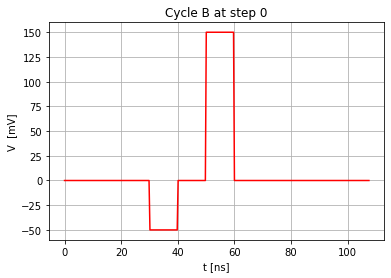

In [31]:
step = 0
pul1 = Sweep_dir_noteil(PulseScheme_B_10nano,70,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle B at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle B, Probe width 10nano {mod} Hz  ,{a} step, {loop}loop number.jpeg'.format(loc = PulseScheme_A_10nano['Measurement file Path'], a = step,mod = modulation, loop = loop_number))

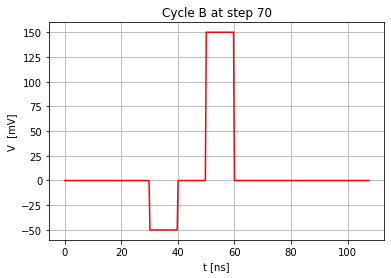

In [21]:
step = 70
pul1 = Sweep_dir_noteil(PulseScheme_B_10nano,70,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ns]')
ax.set_title('Cycle B at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle B, Probe width 10nano 93 Hz {mod} ,{a} step, {loop}loop number.jpeg'.format(loc = PulseScheme_A_10nano['Measurement file Path'], a = step,mod = modulation, loop = loop_number))

In [21]:
sweeping_run_a_10nano = Sweeping_Single_List_File_teil(PulseScheme_A_10nano,30,interval,sam,0,30,AWG_Settings_10nano,'A')[0]
sweeping_run_b_10nano = Sweeping_Single_List_File_teil(PulseScheme_B_10nano,30,interval,sam,0,30,AWG_Settings_10nano,'B')[0]

In [23]:
#Exporting pickle

with open(r"{dict}\cycleA_31steps_93Hz_10nano_.p".format(dict = PulseScheme_A_10nano['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_10nano, k)


with open(r"{dict}\cycleB_31steps_93Hz_10nano_.p".format(dict = PulseScheme_B_10nano['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_10nano, h)

In [16]:
#Importing Pickle

with open(r"{dict}\cycleA_71steps_93Hz_10nano_.p".format(dict = PulseScheme_A_10nano['Measurement file Path']), "rb") as j:
    sweeping_runa_10nano = pickle.load(j)

with open(r"{dict}\cycleB_71steps_93Hz_10nano_.p".format(dict = PulseScheme_A_10nano['Measurement file Path']), "rb") as f:
    sweeping_runb_10nano= pickle.load(f)

In [ ]:
sweeping_run_b_10nano['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentB_672816_30.csv'

In [24]:
Sequence_File(M8190A,sweeping_run_a_10nano['Pulse File Location, at step 70'],sweeping_run_b_10nano['Pulse File Location, at step 70'],loop_number)

Sequence loaded with the following segment data "1,50000,0,1,0,335,2,50000,0,1,0,335" and the advancement method is COND


0

# Loading

In [17]:
M8190A.write('SEQ:DEL:ALL')

12

In [43]:
Lock_In_Settings = {
'Time Constant' : '100ms',
'Sensitivity' : '200 miliVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': r'{mod}Hz'.format(mod=modulation)
}

In [44]:
loop_number

50000

In [79]:
playingtime = 10

data, averaged_data = Voltage_Autocorrelation_loop_cut(M8190A,DAQ_Settings1,playingtime,sweeping_run_a_10nano,sweeping_run_b_10nano,PulseScheme_A_10nano['Measurement file Path'],Lock_In_Settings,loop_number,2)

Sequence loaded with the following segment data "1,50000,0,1,0,335,2,50000,0,1,0,335" and the advancement method is COND
Average Value for measurement at step 0 is 1.191997493978081 V
Sequence loaded with the following segment data "1,50000,0,1,0,335,2,50000,0,1,0,335" and the advancement method is COND
Average Value for measurement at step 1 is 1.191979452684489 V
Sequence loaded with the following segment data "1,50000,0,1,0,335,2,50000,0,1,0,335" and the advancement method is COND
Average Value for measurement at step 2 is 1.1919349602234839 V
Sequence loaded with the following segment data "1,50000,0,1,0,335,2,50000,0,1,0,335" and the advancement method is COND
Average Value for measurement at step 3 is 1.1920181662936649 V
Sequence loaded with the following segment data "1,50000,0,1,0,335,2,50000,0,1,0,335" and the advancement method is COND
Average Value for measurement at step 4 is 1.1920032728299506 V
Sequence loaded with the following segment data "1,50000,0,1,0,335,2,50000,0,

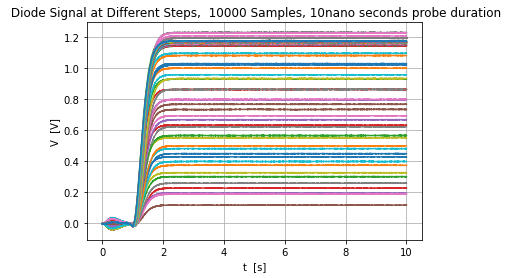

In [80]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(data)):
    plt.plot(data[i][1],data[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [arb. U]')
ax.set_xlabel(r't  [s]')
ax.set_title(r' STM Signal at Different Steps,  {b} Samples, 10ns probe duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\STM Signal time cstant = {a}, sensitivity {b},{c} daqseconds, probe duration 10ns ,{st} steps, {mod} Hz.jpeg'.format(mod = modulation ,loc = PulseScheme_A_10nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime, st = len (sweeping_run_a_10nano)),bbox_inches='tight')

In [81]:
time_delay = np.linspace(-20,20,71)

In [ ]:
%matplotlib widget

In [41]:
1/8e9

1.25e-10

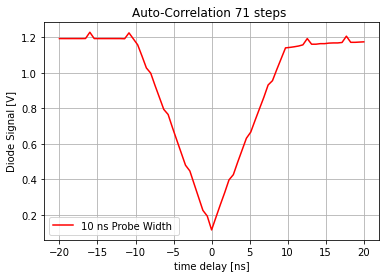

In [82]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,'.-',label=r'10ns Probe Width ',color='brown')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [ns]')
axes.set_ylabel(r'STM Signal [arb Units]')
axes.set_title(r'Auto-Correlation {st} steps '.format(st = len (time_delay)))

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Measured Autocorrelation function {st} steps 10nano {mod} Hz length tc = {a}, sens {b}, {c}s DAQ, {loop} loop number .jpeg'.format(loc = PulseScheme_A_10nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime, loop =loop_number,st = len (time_delay), mod = modulation ))

In [ ]:
background_10n = Signal_to_Background(averaged_data,time_delay,8,8)
background_10n

In [ ]:
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,background_10n[0],'.-',label=r'10ns Pulse Width ',color='brown')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [ns]')
axes.set_ylabel(r'STM Signal [arb Units]')
axes.set_title(r'Auto-Correlation {st} steps '.format(st = len (time_delay)))

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation function {st} steps 10nano {mod} Hz length tc = {a}, sens {b}, {c}s DAQ, {loop} loop number .jpeg'.format(loc = PulseScheme_A_10nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime, loop =loop_number,st = len (time_delay), mod = modulation ))

In [ ]:
norm_10n=(background_10n[0]-1)/(np.amax(background_10n[0]-1))
np.savetxt(r'Averaged\Signal to background\Normalized autocorrelation 10nano.csv',norm_10n,delimiter=',')



fig,axes = plt.subplots()

axes.grid(True)


plt.plot(time_delay,norm_10n,'.-',label=r'10ns Pulse Width ',color='brown')


axes.set_xlabel(r'time delay [ns]')
axes.set_ylabel(r'STM Signal [arb. units]')
axes.set_title(r'Auto-Correlation {st} steps '.format(st = len (time_delay)))

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Normalized Autocorrelation function {st} steps 10nano {mod} Hz length tc = {a}, sens {b}, {c}s DAQ, {loop} loop number .jpeg'.format(loc = PulseScheme_A_10nano['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime, loop =loop_number,st = len (time_delay), mod = modulation ))